# How to Configure Image Data Augmentation in Keras

# This tutorial is divided into eight parts; they are:

* Image Data Augmentation
* Sample Image
* Image Augmentation With ImageDataGenerator
* Horizontal and Vertical Shift Augmentation
* Horizontal and Vertical Flip Augmentation
* Random Rotation Augmentation
* Random Brightness Augmentation
* Random Zoom Augmentation

# Image Data Augmentation

The performance of deep learning neural networks often improves with the amount of data available.

Data augmentation is a technique to artificially create new training data from existing training data. This is done by applying domain-specific techniques to examples from the training data that create new and different training examples.

Image data augmentation is perhaps the most well-known type of data augmentation and involves creating transformed versions of images in the training dataset that belong to the same class as the original image.

Modern deep learning algorithms, such as the convolutional neural network, or CNN, can learn features that are invariant to their location in the image. Nevertheless, augmentation can further aid in this transform invariant approach to learning and can aid the model in learning features that are also invariant to transforms such as left-to-right to top-to-bottom ordering, light levels in photographs, and more.

Image data augmentation is typically only applied to the training dataset, and not to the validation or test dataset. This is different from data preparation such as image resizing and pixel scaling; they must be performed consistently across all datasets that interact with the model.

# Sample Image

### Download from Sample_image

# Image Augmentation With ImageDataGenerator

The Keras deep learning library provides the ability to use data augmentation automatically when training a model.

This is achieved by using the ImageDataGenerator class.

First, the class may be instantiated and the configuration for the types of data augmentation are specified by arguments to the class constructor.

A range of techniques are supported, as well as pixel scaling methods. We will focus on five main types of data augmentation techniques for image data; specifically:

* Image shifts via the width_shift_range and height_shift_range arguments.
* Image flips via the horizontal_flip and vertical_flip arguments.
* Image rotations via the rotation_range argument
* Image brightness via the brightness_range argument.
* Image zoom via the zoom_range argument.

### The images in the dataset are not used directly. Instead, only augmented images are provided to the model. Because the augmentations are performed randomly, this allows both modified images and close facsimiles of the original images (e.g. almost no augmentation) to be generated and used during training.

# Horizontal and Vertical Shift Augmentation

A shift to an image means moving all pixels of the image in one direction, such as horizontally or vertically, while keeping the image dimensions the same.

This means that some of the pixels will be clipped off the image and there will be a region of the image where new pixel values will have to be specified.

The width_shift_range and height_shift_range arguments to the ImageDataGenerator constructor control the amount of horizontal and vertical shift respectively.

These arguments can specify a floating point value that indicates the percentage (between 0 and 1) of the width or height of the image to shift. Alternately, a number of pixels can be specified to shift the image.

Specifically, a value in the range between no shift and the percentage or pixel value will be sampled for each image and the shift performed, e.g. [0, value]. Alternately, you can specify a tuple or array of the min and max range from which the shift will be sampled; for example: [-100, 100] or [-0.5, 0.5].

The example below demonstrates a horizontal shift with the width_shift_range argument between [-200,200] pixels and generates a plot of generated images to demonstrate the effect.

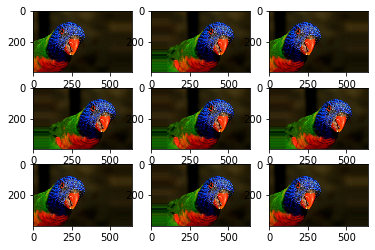

In [24]:
# example of horizontal shift image augmentation

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load the image
img = load_img('bird.jpg')

# convert to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-100,100])

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

#### Below is the same example updated to perform vertical shifts of the image via the height_shift_range argument, in this case specifying the percentage of the image to shift as 0.5 the height of the image.

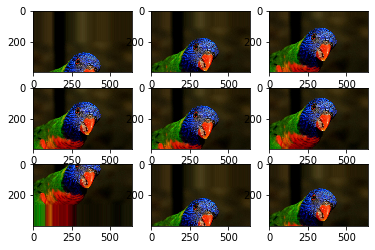

In [25]:
# example of vertical shift image augmentation

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load the image
img = load_img('bird.jpg')

# convert to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

### We can see that both horizontal and vertical positive and negative shifts probably make sense for the chosen photograph, but in some cases, the replicated pixels at the edge of the image may not make sense to a model.

### Note that other fill modes can be specified via “fill_mode” argument.

# Horizontal and Vertical Flip Augmentation

An image flip means reversing the rows or columns of pixels in the case of a vertical or horizontal flip respectively.

The flip augmentation is specified by a boolean horizontal_flip or vertical_flip argument to the ImageDataGenerator class constructor. For photographs like the bird photograph used in this tutorial, horizontal flips may make sense, but vertical flips would not.

For other types of images, such as aerial photographs, cosmology photographs, and microscopic photographs, perhaps vertical flips make sense.

The example below demonstrates augmenting the chosen photograph with horizontal flips via the horizontal_flip argument.

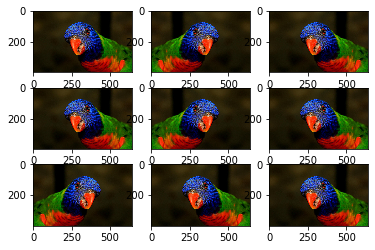

In [26]:
# example of horizontal flip image augmentation

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load the image
img = load_img('bird.jpg')

# convert to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

# Random Rotation Augmentation

A rotation augmentation randomly rotates the image clockwise by a given number of degrees from 0 to 360.

The rotation will likely rotate pixels out of the image frame and leave areas of the frame with no pixel data that must be filled in.

The example below demonstrates random rotations via the rotation_range argument, with rotations to the image between 0 and 90 degrees.

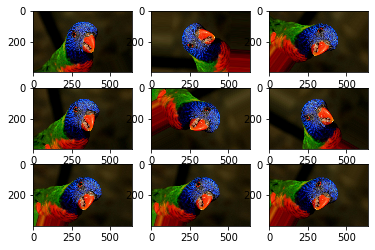

In [27]:
# example of random rotation image augmentation

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load the image
img = load_img('bird.jpg')

# convert to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)

# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

# Random Brightness Augmentation

The brightness of the image can be augmented by either randomly darkening images, brightening images, or both.

The intent is to allow a model to generalize across images trained on different lighting levels.

This can be achieved by specifying the brightness_range argument to the ImageDataGenerator() constructor that specifies min and max range as a float representing a percentage for selecting a brightening amount.

Values less than 1.0 darken the image, e.g. [0.5, 1.0], whereas values larger than 1.0 brighten the image, e.g. [1.0, 1.5], where 1.0 has no effect on brightness.

The example below demonstrates a brightness image augmentation, allowing the generator to randomly darken the image between 1.0 (no change) and 0.2 or 20%.

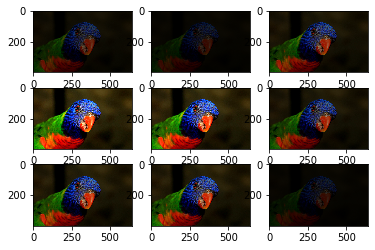

In [28]:
# example of brighting image augmentation

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load the image
img = load_img('bird.jpg')

# convert to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,1.5])

# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

# Random Zoom Augmentation

 zoom augmentation randomly zooms the image in and either adds new pixel values around the image or interpolates pixel values respectively.

Image zooming can be configured by the zoom_range argument to the ImageDataGenerator constructor. You can specify the percentage of the zoom as a single float or a range as an array or tuple.

If a float is specified, then the range for the zoom will be [1-value, 1+value]. For example, if you specify 0.3, then the range will be [0.7, 1.3], or between 70% (zoom in) and 130% (zoom out).

The zoom amount is uniformly randomly sampled from the zoom region for each dimension (width, height) separately.

The zoom may not feel intuitive. Note that zoom values less than 1.0 will zoom the image in, e.g. [0.5,0.5] makes the object in the image 50% larger or closer, and values larger than 1.0 will zoom the image out by 50%, e.g. [1.5, 1.5] makes the object in the image smaller or further away. A zoom of [1.0,1.0] has no effect.

The example below demonstrates zooming the image in, e.g. making the object in the photograph larger.

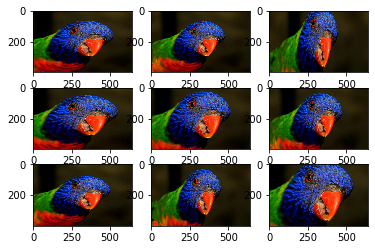

In [40]:
# example of zoom image augmentation

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load the image
img = load_img('bird.jpg')

# convert to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [37]:
len(it)

1